In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import arviz as az
import pystan

In [4]:
es_means = array([28, 8, -3, 7, -1, 1, 18, 12])
es_serrs = array([15, 10, 16, 11, 9, 11, 10, 18])

<ErrorbarContainer object of 3 artists>

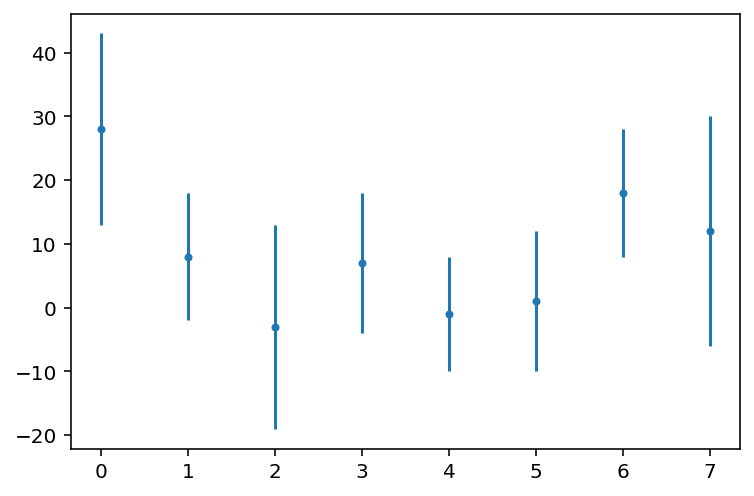

In [6]:
errorbar(arange(len(es_means)), es_means, yerr=es_serrs, fmt='.')

In [20]:
model = pystan.StanModel(file='eight_schools.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e2cc15871b40b6eecaa412f8d1f384f3 NOW.
/Users/wfarr/anaconda3/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/tmpwapvqnpr/stanfit4anon_model_e2cc15871b40b6eecaa412f8d1f384f3_1730953742926525135.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [21]:
data = {
    'Nschools': len(es_means),
    'school_score': es_means,
    'school_se': es_serrs
}

In [22]:
samples = model.sampling(data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122b764a8>,
      dtype=object)

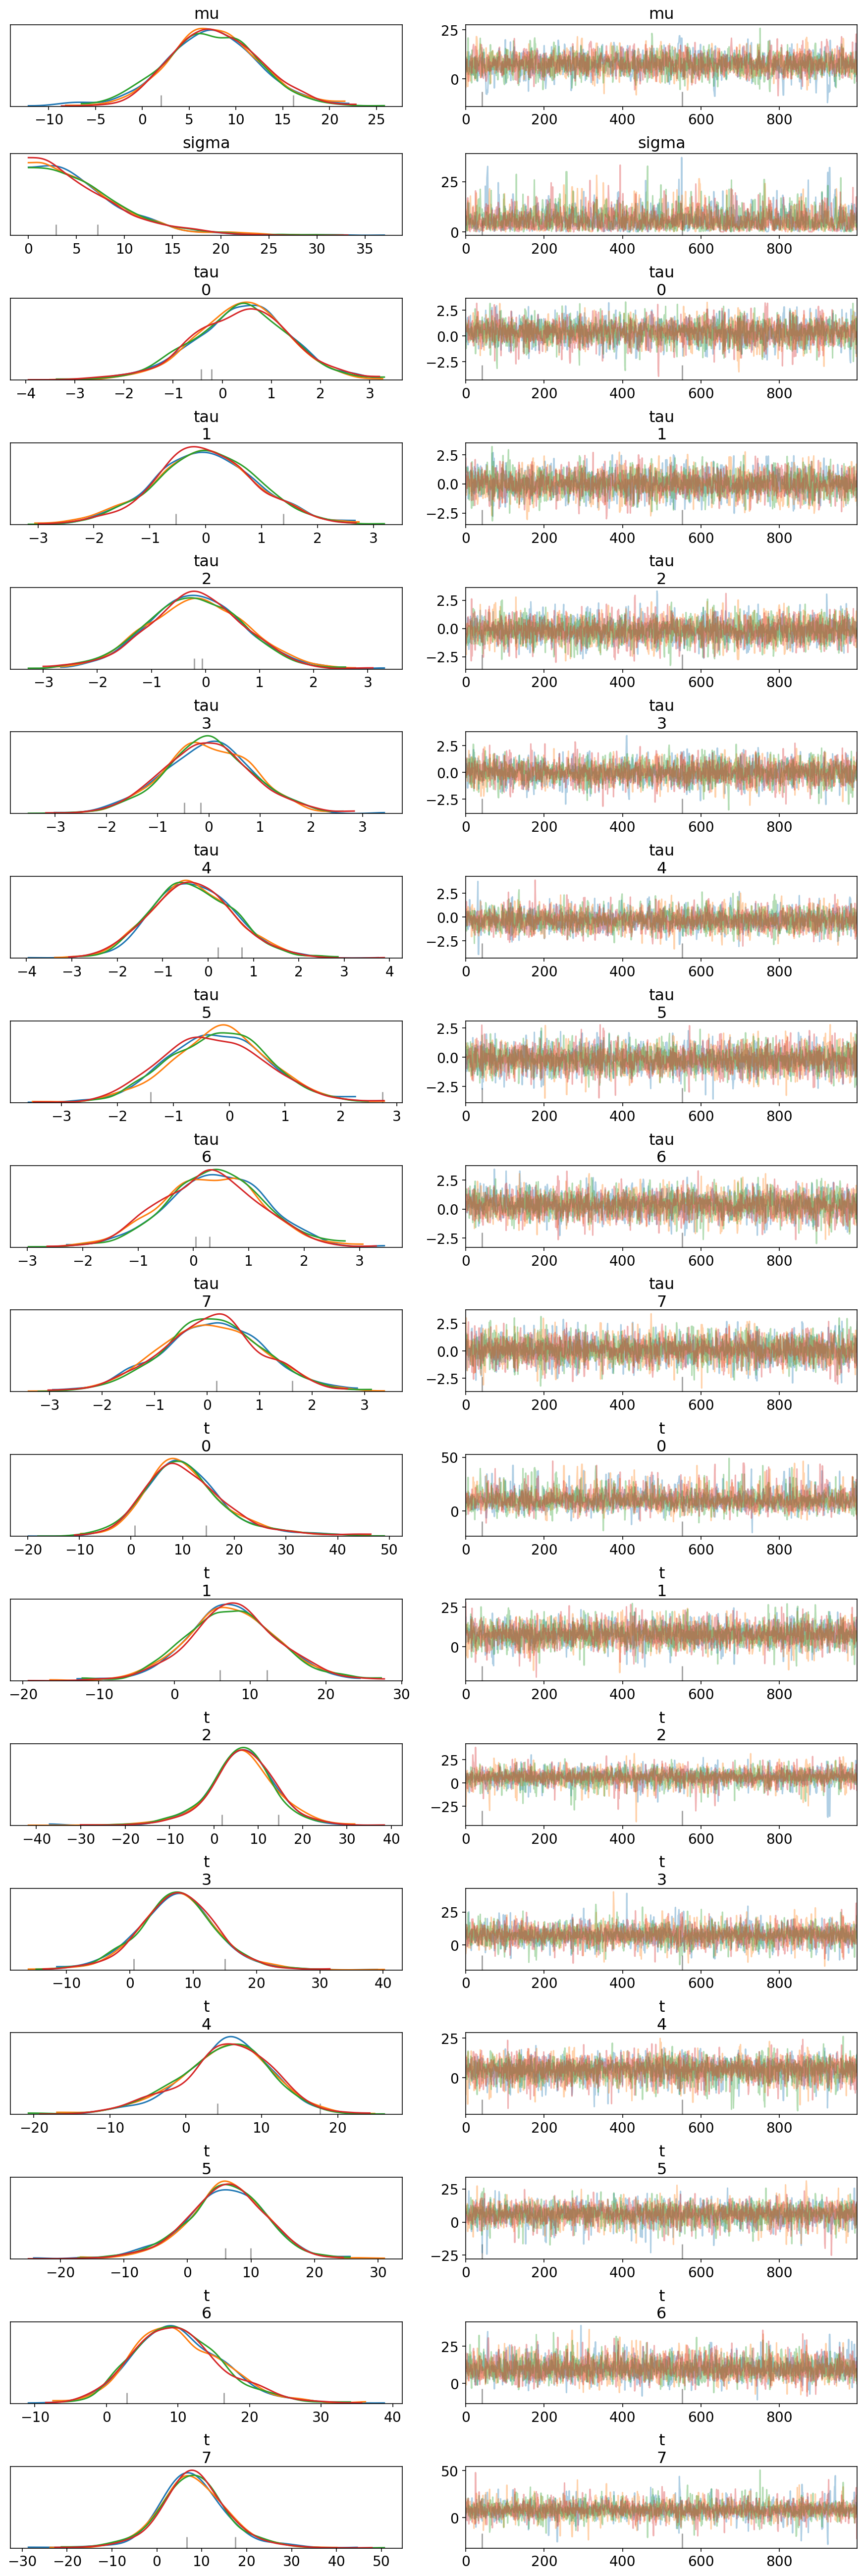

In [23]:
az.plot_trace(samples, compact=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124be0898>],
      dtype=object)

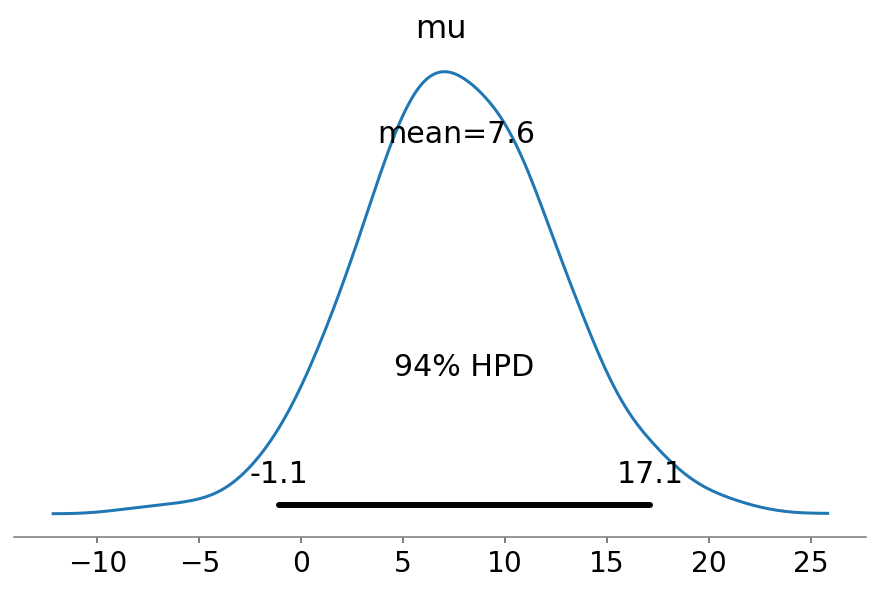

In [24]:
az.plot_posterior(samples, var_names='mu')

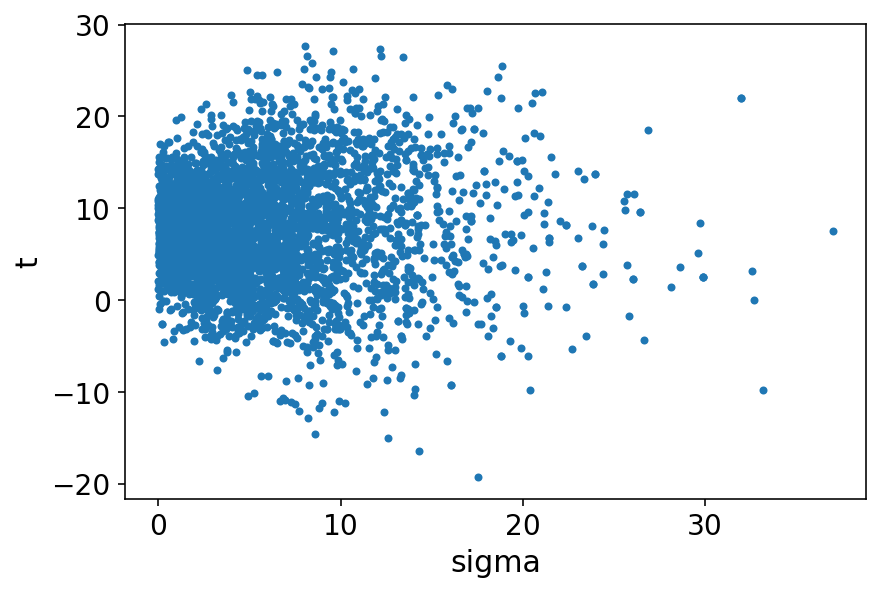

In [25]:
az.plot_pair(samples, var_names=['sigma', 't'], coords={'t_dim_0': 1})